In [ ]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker 
import matplotlib.pyplot as plt
from pathlib import Path


In [3]:
api_key = contents = Path("YT_API_KEY.txt").read_text()
channel_handles = ['@alextheanalyst', # Alex The Analyst
                   '@techTFQ', # techTFQ
                   '@LukeBarousse', # Luke Barousse
                   '@KenJee_ds', # Ken Jee
                   '@TinaHuang1' #Tina Huang
                ]

api_service_name = 'youtube'
api_version = 'v3'

# Initialize YouTube Data API client using google api library
youtube = build(api_service_name, api_version, developerKey=api_key)

# Analyze YouTube Channels About Data Science
## Function to request channel information

In [4]:
# request channel information using youtube data api
def request_channel_info(youtube, channel_handles):
    
    all_data = []
    responses = []
    
    for handle in channel_handles:
        request = youtube.channels().list(
            part='snippet,statistics,contentDetails',
            forHandle=handle
            )
        
        response = request.execute()
        responses.append(response)
        
        
    for response in responses:  
        response_data = response['items'][0]
        data = {'Channel_name': response_data['snippet']['title'],
               'Subscribers': response_data['statistics']['subscriberCount'],
               'Views': response_data['statistics']['viewCount'],
               'Total_videos': response_data['statistics']['videoCount'],
                'Playlist_ID': response_data['contentDetails']['relatedPlaylists']['uploads']
               }
       
        all_data.append(data)
        
        
        
    #return response
    return all_data

In [5]:
channel_statistics = request_channel_info(youtube, channel_handles)

In [6]:
channel_statistics

[{'Channel_name': 'Alex The Analyst',
  'Subscribers': '1000000',
  'Views': '46609471',
  'Total_videos': '351',
  'Playlist_ID': 'UU7cs8q-gJRlGwj4A8OmCmXg'},
 {'Channel_name': 'techTFQ',
  'Subscribers': '360000',
  'Views': '20423450',
  'Total_videos': '139',
  'Playlist_ID': 'UUnz-ZXXER4jOvuED5trXfEA'},
 {'Channel_name': 'Luke Barousse',
  'Subscribers': '507000',
  'Views': '25215260',
  'Total_videos': '163',
  'Playlist_ID': 'UULLw7jmFsvfIVaUFsLs8mlQ'},
 {'Channel_name': 'Ken Jee',
  'Subscribers': '267000',
  'Views': '9334072',
  'Total_videos': '288',
  'Playlist_ID': 'UUiT9RITQ9PW6BhXK0y2jaeg'},
 {'Channel_name': 'Tina Huang',
  'Subscribers': '791000',
  'Views': '35744070',
  'Total_videos': '243',
  'Playlist_ID': 'UU2UXDak6o7rBm23k3Vv5dww'}]

In [7]:
# chonvert channel data to panda DataFrame
channel_data = pd.DataFrame(channel_statistics)

In [8]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,Playlist_ID
0,Alex The Analyst,1000000,46609471,351,UU7cs8q-gJRlGwj4A8OmCmXg
1,techTFQ,360000,20423450,139,UUnz-ZXXER4jOvuED5trXfEA
2,Luke Barousse,507000,25215260,163,UULLw7jmFsvfIVaUFsLs8mlQ
3,Ken Jee,267000,9334072,288,UUiT9RITQ9PW6BhXK0y2jaeg
4,Tina Huang,791000,35744070,243,UU2UXDak6o7rBm23k3Vv5dww


In [9]:
channel_data[['Subscribers','Views','Total_videos']] = channel_data[['Subscribers','Views','Total_videos']].apply(pd.to_numeric)

In [10]:
channel_data = channel_data.sort_values(by='Subscribers', ascending=True)

## Plot the statistic results

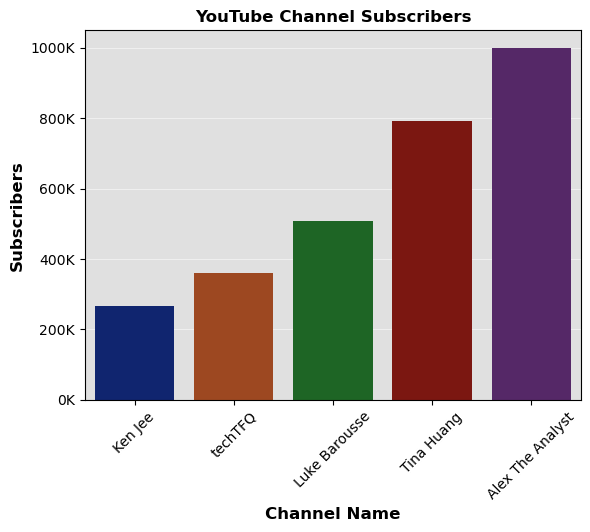

In [11]:
ax=plt.subplot()
ax.set_facecolor('#e0e0e0')
ax.grid(True,axis='y', linestyle='-', color='white', alpha=0.5)
sns.barplot(x='Channel_name', y='Subscribers', hue='Channel_name', data=channel_data, 
            palette='dark', legend = False, ax=ax, zorder = 2)
ax.set_xlabel('Channel Name', fontsize=12, fontweight='bold')
ax.set_ylabel('Subscribers', fontsize=12, fontweight='bold')
ax.tick_params(axis='x', labelsize=10, rotation=45)
ax.tick_params(axis='y', labelsize=10)
ax.set_title('YouTube Channel Subscribers', fontsize=12, fontweight='bold');
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1e3)}K'))

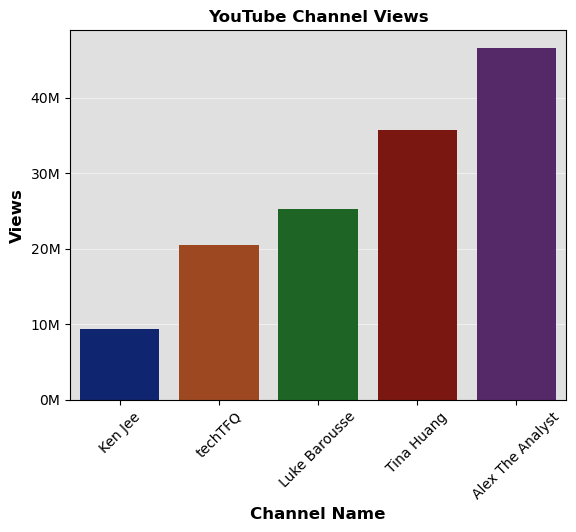

In [12]:
ax=plt.subplot()
ax.set_facecolor('#e0e0e0')
ax.grid(True, axis='y', linestyle='-', color='white', alpha=0.5)
sns.barplot(x='Channel_name', y='Views', hue='Channel_name', data=channel_data, 
            palette='dark', legend=False, ax=ax, zorder=2)
ax.set_xlabel('Channel Name',fontsize=12, fontweight='bold')
ax.set_ylabel('Views',fontsize=12, fontweight='bold')
ax.tick_params(axis='x', labelsize=10,rotation=45)
ax.tick_params(axis='y',labelsize=10)
ax.set_title('YouTube Channel Views',fontsize=12, fontweight='bold');
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1e6)}M'))

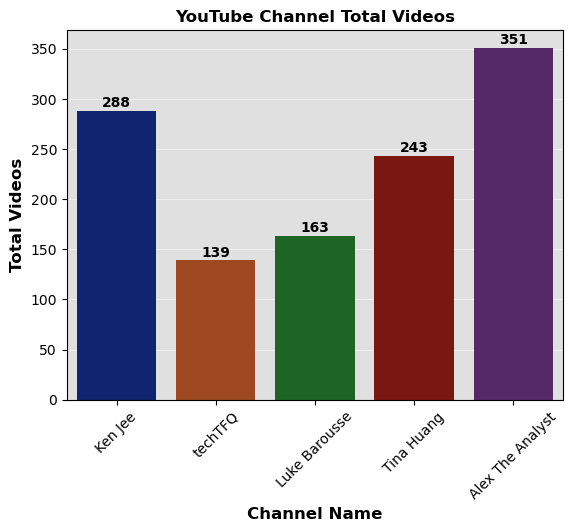

In [13]:
ax = plt.subplot()
ax.set_facecolor('#e0e0e0')
ax.grid(True, axis='y', linestyle='-', color='white', alpha=0.5)
sns.barplot(x='Channel_name', y='Total_videos', hue='Channel_name', data=channel_data, 
            palette='dark', legend=False, ax=ax, zorder=2)
ax.set_xlabel('Channel Name',fontsize=12, fontweight='bold')
ax.set_ylabel('Total Videos',fontsize=12, fontweight='bold')
ax.tick_params(axis='x', labelsize=10,rotation=45)
ax.tick_params(axis='y',labelsize=10)
ax.set_title('YouTube Channel Total Videos',fontsize=12, fontweight='bold');


for i, value in enumerate(channel_data['Total_videos']):
    plt.text(i, value+1, str(value), ha='center', va='bottom',fontsize=10, fontweight='bold')

# Analyze A Specific Channel

## Funtion to get video IDs

In [ ]:
def get_playlist_videos(youtube, Playlist_ID): 
    
    video_ids = []
    next_page_token = None   
    
    while True: 
        request = youtube.playlistItems().list(
            part="snippet,contentDetails",
            maxResults=50,
            pageToken=next_page_token,
            playlistId=Playlist_ID)
        response = request.execute()
        #return response

    
        for item in response['items']:
           video_id = item['contentDetails']['videoId']
           title = item['snippet']['title']       
           video_ids.append({'video_id': video_id,
                             'title': title})

        
        next_page_token=response.get('nextPageToken')
        #print(next_page_token)
        if not next_page_token:
            break
    
           
    return video_ids
   
   

In [51]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,Playlist_ID
3,Ken Jee,267000,9334072,288,UUiT9RITQ9PW6BhXK0y2jaeg
1,techTFQ,360000,20423450,139,UUnz-ZXXER4jOvuED5trXfEA
2,Luke Barousse,507000,25215260,163,UULLw7jmFsvfIVaUFsLs8mlQ
4,Tina Huang,791000,35744070,243,UU2UXDak6o7rBm23k3Vv5dww
0,Alex The Analyst,1000000,46609471,351,UU7cs8q-gJRlGwj4A8OmCmXg


In [63]:
playlist_ID = channel_data.loc[channel_data['Channel_name']=='Alex The Analyst','Playlist_ID'].iloc[0]

In [72]:
video_ids = get_playlist_videos(youtube, playlist_ID)

In [73]:
video_ids

[{'video_id': '1ql4kNv0_qY',
  'title': 'Where to find the Best Healthcare Data'},
 {'video_id': 'r5512UY3MTc',
  'title': '1 Million Subscriber Livestream!! Giveaways + Chat'},
 {'video_id': 'XuOcmjIbFGg',
  'title': 'Taking a look at Real Healthcare Data | ICD11, CPT, HCPCS, Claims'},
 {'video_id': 'Ka2mDrKEAhg',
  'title': 'How to Become a Healthcare Analyst in 2025'},
 {'video_id': 'k8nBWL6K884', 'title': 'What is Healthcare Analytics?'},
 {'video_id': 'WpX2F2BS3Qc',
  'title': 'What is Data Cleaning? | Data Fundamentals for Beginners'},
 {'video_id': 'cd_jj0IRmaA',
  'title': 'What is Data Collection? | Data Fundamentals for Beginners'},
 {'video_id': 'OcG0B4ny1cE',
  'title': 'What are File Types? | Data Fundamentals for Beginners'},
 {'video_id': 'hXpt8zj_ajc',
  'title': 'What are Data Types? | Data Fundamentals for Beginners'},
 {'video_id': 'ItZlTixh6Bs',
  'title': 'What are KPIs and Metrics? | Data Fundamental for Beginners'},
 {'video_id': 'PEWMgtu-1e4',
  'title': 'What i